In [ ]:
# Setup - copy-pasted from 2A

# Python ≥3.9 is required
import sys
assert sys.version_info >= (3, 9)

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

# Statistical analysis and testing
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Ignore useless warnings (see SciPy issue #5998 and seaborn/matplotlib bug)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="The figure layout has changed to tight")

import json

In [1]:
import scryfall_preprocessing as sf

from importlib import reload
reload(sf)

<module 'scryfall_preprocessing' from '/Users/charlie/DataScience/mtg_price_analysis/scryfall_preprocessing.py'>

In [2]:
df = sf.get_cards()
df2 = sf.expand_dict_features(df)
df3 = sf.standard_only(df2)
df4 = sf.drop_junk_features(df3)
#df5 = sf.drop_more_features(df4)
df6 = sf.remove_legalities(df4)
df7 = sf.ordinate_rarities(df6)
df8 = sf.cut_subtypes(df7)

In [3]:
df8

,name,released_at,layout,mana_cost,cmc,power,toughness,colors,color_identity,keywords,...,security_stamp,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,eur,ordinate_rarity,types
0,"Greta, Sweettooth Scourge",2023-09-08,normal,{1}{B}{G},3.000,3,3,"[B, G]","[B, G]",[Food],...,NaN,False,False,True,False,4557.000,3832.000,0.12,2,"[Legendary, Creature]"
1,Seedship Agrarian,2025-08-01,normal,{3}{G},4.000,3,3,[G],[G],[Landfall],...,NaN,False,False,True,False,14544.000,NaN,0.09,2,[Creature]
2,Escape Tunnel,2025-08-01,normal,,0.000,NaN,NaN,[],[],[],...,NaN,False,False,False,False,1078.000,372.000,0.25,1,[Land]
3,Food Fight,2023-09-08,normal,{1}{R},2.000,NaN,NaN,[R],[R],[],...,oval,False,False,True,False,17537.000,4983.000,0.10,3,[Enchantment]
4,Witch's Mark,2023-09-08,normal,{1}{R},2.000,NaN,NaN,[R],[R],[Role token],...,NaN,False,False,True,False,3345.000,3728.000,0.12,1,[Sorcery]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,Duelist of the Mind,2024-04-19,normal,{1}{U},2.000,*,3,[U],[U],"[Flying, Vigilance]",...,oval,False,False,True,False,10200.000,2463.000,0.33,3,[Creature]
3397,Twinmaw Stormbrood // Charring Bite,2025-04-11,adventure,{5}{W} // {1}{R},6.000,5,4,[W],"[R, W]",[Flying],...,NaN,False,False,True,False,15248.000,4286.000,0.12,2,"[Creature, —, Dragon, //, Sorcery]"
3398,Wildheart Invoker,2024-11-15,normal,{2}{G}{G},4.000,4,3,[G],[G],[],...,NaN,False,False,False,False,11878.000,14248.000,0.20,1,[Creature]
3399,Auxiliary Boosters,2025-08-01,normal,{4}{W},5.000,NaN,NaN,[W],[W],[Equip],...,NaN,False,False,True,False,21027.000,NaN,0.04,1,[Artifact]


# END OF COPY-PASTE

In [4]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3401 non-null   object 
 1   released_at      3401 non-null   object 
 2   layout           3401 non-null   object 
 3   mana_cost        3334 non-null   object 
 4   cmc              3401 non-null   float64
 5   power            1946 non-null   object 
 6   toughness        1946 non-null   object 
 7   colors           3334 non-null   object 
 8   color_identity   3401 non-null   object 
 9   keywords         3401 non-null   object 
 10  reserved         3401 non-null   bool   
 11  game_changer     3401 non-null   bool   
 12  foil             3401 non-null   bool   
 13  nonfoil          3401 non-null   bool   
 14  oversized        3401 non-null   bool   
 15  promo            3401 non-null   bool   
 16  reprint          3401 non-null   bool   
 17  variation     

In [5]:
df8.sample(5)

,name,released_at,layout,mana_cost,cmc,power,toughness,colors,color_identity,keywords,...,security_stamp,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,eur,ordinate_rarity,types
3243,Great Arashin City,2025-04-11,normal,,0.000,NaN,NaN,[],[B],[],...,oval,False,False,True,False,9262.000,2182.000,0.31,3,[Land]
3033,Rootwise Survivor,2024-09-27,normal,{3}{G}{G},5.000,3,4,[G],[G],"[Haste, Survival]",...,NaN,False,False,True,False,22150.000,NaN,0.04,2,[Creature]
1452,Armored Kincaller,2023-11-17,normal,{2}{G},3.000,3,3,[G],[G],[],...,NaN,False,False,True,False,14539.000,7829.000,0.09,1,[Creature]
704,Hopeful Vigil,2023-09-08,normal,{1}{W},2.000,NaN,NaN,[W],[W],[Scry],...,NaN,False,False,True,False,17308.000,1633.000,0.13,1,[Enchantment]
989,Fight On!,2025-06-13,normal,{2}{B},3.000,NaN,NaN,[B],[B],[],...,triangle,False,False,True,False,9461.000,NaN,0.09,1,[Instant]


In [6]:
set(df8.set_type)

{'commander',
 'core',
 'draft_innovation',
 'duel_deck',
 'expansion',
 'masters',
 'starter'}

In [7]:
#housing.sqft_living.hist(bins=100, figsize=(12 ,8))

eur = df8.eur.astype("float64")
eur=eur[eur!=0]
log_eur = np.log10(eur)
eur.describe()
#print(tix)

count   3401.000
mean       0.890
std        3.135
min        0.020
25%        0.060
50%        0.120
75%        0.310
max       42.690
Name: eur, dtype: float64

In [8]:
df9 = sf.convert_all_to_numbers(df8)
df9

,name,released_at,layout,mana_cost,power,toughness,colors,color_identity,keywords,set,...,nonfoil,oversized,promo,reprint,variation,digital,story_spotlight,full_art,textless,booster
0,"Greta, Sweettooth Scourge",2023-09-08,normal,{1}{B}{G},3,3,"[B, G]","[B, G]",[Food],woe,...,1,0,0,0,0,0,0,0,0,1
1,Seedship Agrarian,2025-08-01,normal,{3}{G},3,3,[G],[G],[Landfall],eoe,...,1,0,0,0,0,0,0,0,0,1
2,Escape Tunnel,2025-08-01,normal,,NaN,NaN,[],[],[],eoc,...,1,0,0,1,0,0,0,0,0,0
3,Food Fight,2023-09-08,normal,{1}{R},NaN,NaN,[R],[R],[],woe,...,1,0,0,0,0,0,0,0,0,1
4,Witch's Mark,2023-09-08,normal,{1}{R},NaN,NaN,[R],[R],[Role token],woe,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,Duelist of the Mind,2024-04-19,normal,{1}{U},*,3,[U],[U],"[Flying, Vigilance]",otj,...,1,0,0,0,0,0,0,0,0,1
3397,Twinmaw Stormbrood // Charring Bite,2025-04-11,adventure,{5}{W} // {1}{R},5,4,[W],"[R, W]",[Flying],tdm,...,1,0,0,0,0,0,0,0,0,1
3398,Wildheart Invoker,2024-11-15,normal,{2}{G}{G},4,3,[G],[G],[],fdn,...,1,0,0,1,0,0,0,0,0,0
3399,Auxiliary Boosters,2025-08-01,normal,{4}{W},NaN,NaN,[W],[W],[Equip],eoe,...,1,0,0,0,0,0,0,0,0,1


In [9]:
def create_log_tix(data = pd.DataFrame) -> pd.DataFrame:
    engineered_data = data.copy()
    tix_values = engineered_data.tix
    log_tix = np.log(np.add(tix_values,0.005)).astype("float64").rename("log_tix")
    print(log_tix)
    engineered_data = engineered_data.join(log_tix)
    return engineered_data

In [10]:
df6 = create_log_tix(df5)

NameError: name 'df5' is not defined

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46956 entries, 0 to 97270
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               46956 non-null  object 
 1   mtgo_id          46956 non-null  float64
 2   name             46956 non-null  object 
 3   released_at      46956 non-null  object 
 4   layout           46956 non-null  object 
 5   mana_cost        46315 non-null  object 
 6   cmc              46950 non-null  float64
 7   type_line        46950 non-null  object 
 8   colors           46315 non-null  object 
 9   color_identity   46956 non-null  object 
 10  keywords         46956 non-null  object 
 11  produced_mana    6956 non-null   object 
 12  set_type         46956 non-null  object 
 13  rarity           46956 non-null  object 
 14  border_color     46956 non-null  object 
 15  frame            46956 non-null  object 
 16  power            22595 non-null  object 
 17  toughness        

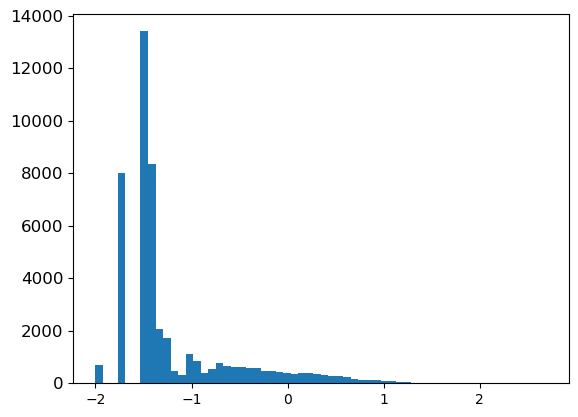

In [ ]:
plt.hist(log_tix, bins=60)
plt.show()

In [ ]:
other = df6[df6.rarity=="mythic"]
pd.concat([other, df6[df6.rarity=="special"]])
pd.concat([other, df6[df6.rarity=="bonus"]])

common = df6[df6.rarity=="common"]
uncommon = df6[df6.rarity=="uncommon"]
rare = df6[df6.rarity=="rare"]
mythic = df6[df6.rarity=="mythic"]
bonus = df6[df6.rarity=="bonus"]
special = df6[df6.rarity=="special"]

#other = pd.concat([mythic, bonus, special])

common.info()

plt.plot(np.sort(common.log_tix), color="blue")
plt.plot(np.sort(uncommon.log_tix), color="green")
plt.plot(np.sort(rare.log_tix), color="purple")
plt.plot(np.sort(mythic.log_tix), color="red")
plt.plot(np.sort(special.log_tix), color="orange")
plt.plot(np.sort(bonus.log_tix), color="yellow")

plt.plot(np.sort(other.log_tix), color="black")


plt.legend()
plt.show

<class 'pandas.core.frame.DataFrame'>
Index: 15806 entries, 0 to 97270
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15806 non-null  object 
 1   mtgo_id          15806 non-null  float64
 2   name             15806 non-null  object 
 3   released_at      15806 non-null  object 
 4   layout           15806 non-null  object 
 5   mana_cost        15728 non-null  object 
 6   cmc              15800 non-null  float64
 7   type_line        15800 non-null  object 
 8   colors           15728 non-null  object 
 9   color_identity   15806 non-null  object 
 10  keywords         15806 non-null  object 
 11  produced_mana    3262 non-null   object 
 12  set_type         15806 non-null  object 
 13  rarity           15806 non-null  object 
 14  border_color     15806 non-null  object 
 15  frame            15806 non-null  object 
 16  power            7234 non-null   object 
 17  toughness        

/var/folders/sw/pwx4c2hx5dn8lyy63sj549ch0000gn/T/ipykernel_12289/1903561149.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
df6.columns

Index(['id', 'mtgo_id', 'name', 'released_at', 'layout', 'mana_cost', 'cmc',
       'type_line', 'colors', 'color_identity', 'keywords', 'produced_mana',
       'set_type', 'rarity', 'border_color', 'frame', 'power', 'toughness',
       'edhrec_rank', 'penny_rank', 'standard', 'future', 'pioneer', 'modern',
       'legacy', 'pauper', 'vintage', 'penny', 'commander', 'oathbreaker',
       'paupercommander', 'duel', 'oldschool', 'premodern', 'predh', 'tix',
       'reserved', 'foil', 'nonfoil', 'promo', 'reprint', 'digital',
       'story_spotlight', 'full_art', 'textless', 'booster', 'log_tix'],
      dtype='object')

In [ ]:
rarities = [common, uncommon, rare, mythic, special, bonus]

for i in rarities:
    print(np.mean(i.tix))
    print(np.median(i.tix))
    print(len(i))
    print("") 

0.1097051752499051
0.04
15806

0.13219146934295126
0.04
12754

0.726855169584245
0.03
14624

1.4476091415177266
0.25
3413

0.9806857142857143
0.22
350

10.816666666666665
5.47
9



In [ ]:
import seaborn as sns

rarities_tix_list = [rarities[i].log_tix for i in range(6)]
rarity_names = ["C","U","R","M","S","B"]

fig, axs = plt.subplots(1,6)

for i in range(6):
    axs[i].boxplot(rarities_tix_list[i])
    axs[i].set_xlabel(rarity_names[i])

In [ ]:
p = df6[
    ["edhrec_rank","penny_rank","cmc","reserved","log_tix"]
].plot.box(subplots=True, layout=(3, 3), figsize=(18,18))

In [ ]:
plt.scatter(df6["edhrec_rank"],df6["log_tix"], alpha=0.05)

In [ ]:
plt.scatter(df6["penny_rank"],df6["log_tix"], alpha=0.1)

In [ ]:
plt.scatter(df6["cmc"],df6["log_tix"], alpha=0.02)

In [ ]:
#plt.scatter(df6["power"],np.log(df6["tix"]), alpha=0.02)

In [ ]:
#plt.scatter(df5["reserved"],np.log(df5["tix"]), alpha=0.005)

In [ ]:
#plt.scatter(df5["foil"],np.log(df5["tix"]), alpha=0.01)

In [ ]:
def ordinate_rarities(data: pd.DataFrame) -> pd.DataFrame:
    ordinate_rarities_dict = {
        "common": 1, 
        "uncommon": 2,
        "rare": 3, 
        "mythic": 4, 
        "special": 5, 
        "bonus": 5, 
    }
    engineered_data = data.copy()
    ordinate_rarity = [ordinate_rarities_dict[x] for x in engineered_data["rarity"]]
    engineered_data.drop(columns="rarity").join(ordinate_rarity)
    return engineered_data
    #ordinate_rarity = ordinate_rarities_dict[tuple(engineered_data["rarity"][:30])[1]]
    #print(ordinate_rarity)

In [ ]:
#df7 = ordinate_rarities(df6)
#df7

In [ ]:
corr_matrix = df6.corr(numeric_only=True)
corr_matrix["log_tix"].sort_values(ascending=False)

log_tix            1.000
tix                0.397
mtgo_id            0.234
promo              0.234
digital            0.218
reprint            0.208
reserved           0.078
textless           0.034
full_art           0.027
cmc               -0.032
story_spotlight   -0.045
nonfoil           -0.168
penny_rank        -0.199
foil              -0.218
edhrec_rank       -0.299
booster           -0.451
Name: log_tix, dtype: float64

In [ ]:
# Would it be an idea to create a variable of "power / mana value"?

In [ ]:
# BIG PLAN: First, finish data preprocessing (UGHHHHHH)
# Then create a baseline model (it'll suck - dataset is highly biased)
# Then downweight low prices (exclude a subset of cards with 0.01 or 0.02 tix from the dataset)